In [1]:
from s04utils.modules.load.Timestamps import Timestamps
from s04utils.modules.load.BinnedTimestamps import BinnedTimestamps

from s04utils.modules.analyze.dwelltime_analyzer import DwellTimeAnalyzer

from matplotlib import pyplot as plt

In [2]:
# set path to data files folder
SOURCE_PATH = '/Users/kappel/Messungen/Setup04/JaKa/24_01_31/77K-10nM-AF488-RM-50mMsalt-mu20-vitrified/05uW/timestamps/tt_AF488_10nM_RM_mu20_50mM_salt_05uW_77K_circpol_001.h5'

In [3]:
timestamps = Timestamps(SOURCE_PATH)

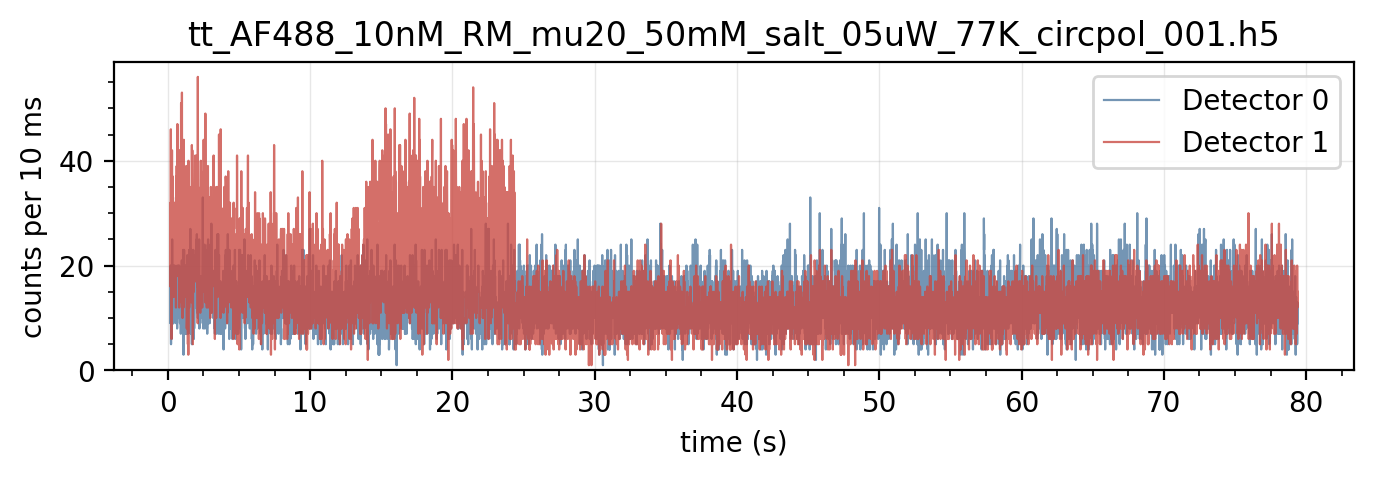

In [4]:
timestamps.preview()

In [5]:
print(timestamps.groups)
h5_groups = timestamps.groups

['correlations0', 'identity', 'photon_data0', 'sample', 'setup']


In [6]:
timestamps_binned = BinnedTimestamps(SOURCE_PATH, bin_width=0.01)

In [7]:
comment = timestamps.h5_content['comment'][()].decode('utf-8')
print(comment)

# parse the comment
comment = comment.split('\n')
print(comment)

# strip spaces from the comment
comment = [line.strip() for line in comment]
print(comment)

# create dictionary from comment
# first line is the first key, the rest is the value
comment_dict = {comment[0]: comment[1:]}



print(comment_dict)

cursor position:
  x: 1,167527E-4 m
  y: 1,182941E-4 m
['cursor position:', '  x: 1,167527E-4 m', '  y: 1,182941E-4 m']
['cursor position:', 'x: 1,167527E-4 m', 'y: 1,182941E-4 m']
{'cursor position:': ['x: 1,167527E-4 m', 'y: 1,182941E-4 m']}


In [8]:
analyzer = DwellTimeAnalyzer(timestamps_binned, min_states=2, max_states=2)

In [9]:
analyzer.last_steps

{'detector_0': 7880, 'detector_1': 7819, 'detector_sum': 7871}

In [10]:
analyzer.viterbi_steps

{'detector_0': array([13, 13, 13, ..., 12, 12, 12]),
 'detector_1': array([21, 21, 21, ..., 11, 11, 11]),
 'detector_sum': array([35, 35, 35, ..., 24, 24, 24])}

In [11]:
sf_HMM_dict = analyzer.get_step_finder_HMM()

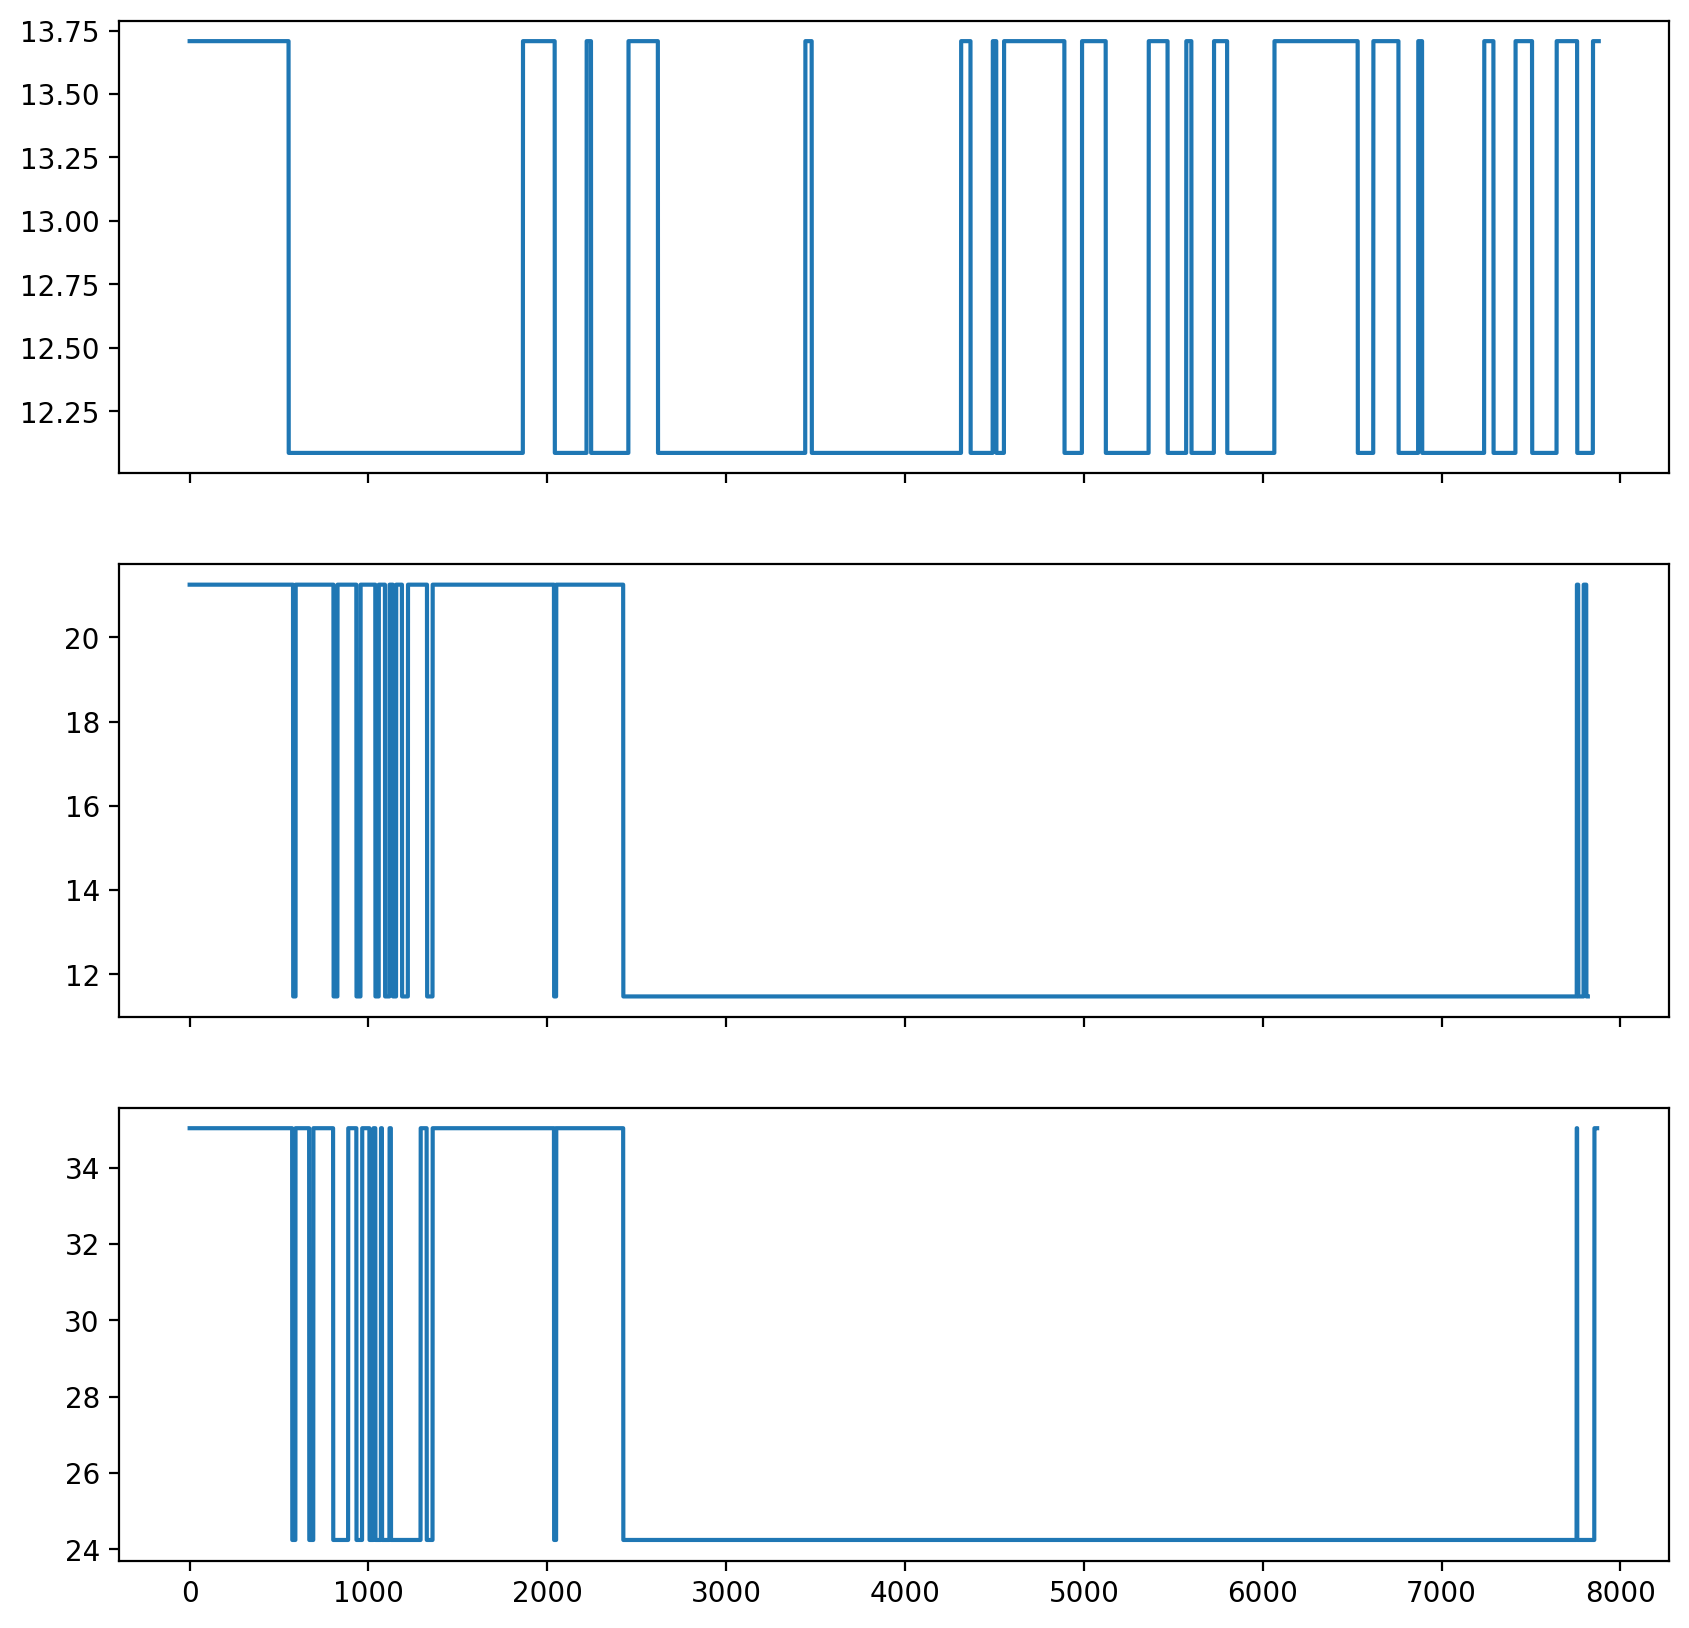

In [12]:
sf_viterbi_dict = analyzer.viterbi_path

# Create a plot with 3 subplots and a shared x-axis
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))


axs[0].plot(sf_viterbi_dict['detector_0'])
axs[1].plot(sf_viterbi_dict['detector_1'])
axs[2].plot(sf_viterbi_dict['detector_sum'])

plt.show()

In [17]:
# get the dwell times
keys = analyzer.dwell_times['detector_1'].keys()

analyzer.dwell_times['detector_1'][11]



array([  13,   21,   22,   18,   24,   17,   32,   30,   11, 5331,   29,
          8])

In [14]:
analyzer.dwell_times['detector_1'].keys()

dict_keys([11, 21])